#  *Exploratory Data Analysis*
This will show us how we can do EDA with Python

**Three Important Steps to keep in mind are**:
- Understanding the data
- Cleaning Data
- Building Relationship within the Data


In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Downloading Titanic Data
titanic = sns.load_dataset("titanic")

In [3]:
# saving dataset to local dir
titanic.to_csv("titanic.csv")

In [4]:
# getting data info
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
# making shortname for titanic dataset
df = titanic

In [6]:
# Getting data of top 5 rows
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
#rows and column number
df.shape

(891, 15)

In [8]:
#information about numeric data columns
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# unique values in data
df.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [10]:
# column names 
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [11]:
# unique value in a single colum within data
df['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

In [12]:
# unique values with in different columns
df['adult_male'].unique()

array([ True, False])

In [13]:
# # unique values with in all columns(Uncomment to check)
# for u in df:
#   print(df[u].unique())
#getting unique values in selected columns
np.unique(df[['sex', 'who','class']].values)

array(['First', 'Second', 'Third', 'child', 'female', 'male', 'man',
       'woman'], dtype=object)

##  Cleaning and Filtering the Data

In [14]:
# finding missing values (Null Value)
# df.isnull()
# ## finding missing values (counting Null Value)
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [15]:
# cleaning data, droping deck values from deck column due to lots of missing values
ndf= df.drop(['deck'], axis=1)
ndf.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [16]:
# droping null and empty values from age column
ndf=ndf.dropna()
ndf.shape

(712, 14)

In [17]:
# checkingfurther null values
ndf.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [18]:
# now data cleaned succefully
#now further checking data 
ndf['sex'].value_counts()

male      453
female    259
Name: sex, dtype: int64

In [19]:
# it is very important to clean data to get best values for describe function
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
#now data cleaned and further values cleaned
ndf.describe()

,survived,pclass,age,sibsp,parch,fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [21]:
# finding columns in data
ndf.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

<AxesSubplot:ylabel='age'>

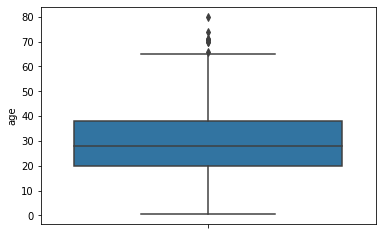

In [22]:
#finding outliers_simple technique
# sns.boxplot(data=ndf,x='sex',y='age')
#boxplot gives us minimum values, 
# maximum values ,intercortile range, 
# median and 
# all the line going outside the box are outliers
#now getting box plot for age column
# they are showing min, max,median, and outliers for column "age"
sns.boxplot(data=ndf,y='age')

C:\Users\mrloo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

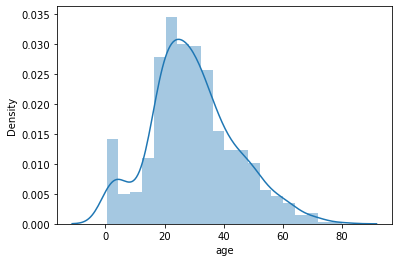

In [23]:
# also outliers can be further emphasized by distplot
#checking normality for the cleaned data
sns.distplot(ndf['age'])


In [24]:
# removing outlier will help to better understand data
ndf['age'].mean()

29.64209269662921

In [25]:
#by watching boxplot value of outlier we can actually remove outliers from the data
ndf=ndf[ndf['age']<68]
ndf.head()
#checking mean
ndf['age'].mean()

29.21797163120567

In [26]:
#now checking values in columns again
ndf.shape

(705, 14)

<AxesSubplot:ylabel='age'>

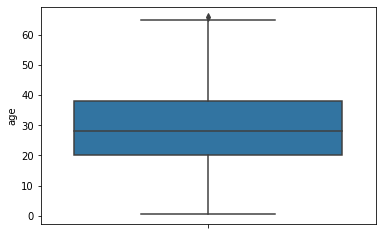

In [27]:
#checking ouliers again
sns.boxplot(data=ndf, y ='age')

In [28]:
#checking data again
ndf.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


<AxesSubplot:>

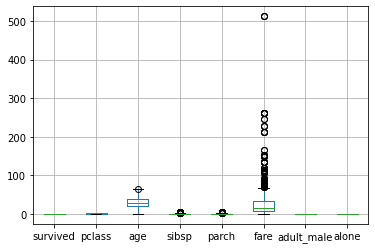

In [29]:
#checking data again using data updated
ndf.boxplot()

In [30]:
#fare is different so 
# it is very important to 
# understand nature of data so 
# these are not outliers 
# given in fare data but still we 
# can make it reduced easily 
# ndf= ndf[ndf['fare']<300]
# ndf.histplot()

array([[<AxesSubplot:title={'center':'survived'}>,
        <AxesSubplot:title={'center':'pclass'}>],
       [<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sibsp'}>],
       [<AxesSubplot:title={'center':'parch'}>,
        <AxesSubplot:title={'center':'fare'}>]], dtype=object)

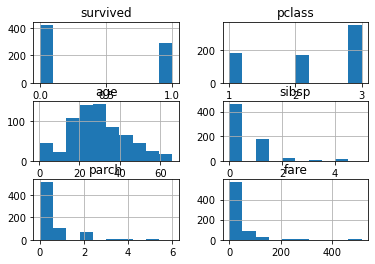

In [31]:
# further to normalize data we need to do loc transformations and other different things
#now plotting histogram of the data
ndf.hist()

<AxesSubplot:>

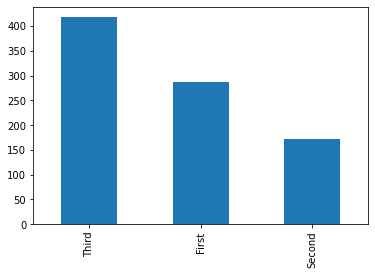

In [32]:
# we can also make barplot of the data 
# Also value count graphs can be made
pd.value_counts(ndf['survived']).plot.bar()
pd.value_counts(ndf['who']).plot.bar()
pd.value_counts(ndf['class']).plot.bar()

In [33]:
#groupping and visualizing data 
# ndf.groupby(['sex','class']).mean().plot.bar()
df.groupby(['sex','class']).mean()

survived  pclass        age     sibsp     parch        fare  \
sex    class                                                                 
female First   0.968085     1.0  34.611765  0.553191  0.457447  106.125798   
       Second  0.921053     2.0  28.722973  0.486842  0.605263   21.970121   
       Third   0.500000     3.0  21.750000  0.895833  0.798611   16.118810   
male   First   0.368852     1.0  41.281386  0.311475  0.278689   67.226127   
       Second  0.157407     2.0  30.740707  0.342593  0.222222   19.741782   
       Third   0.135447     3.0  26.507589  0.498559  0.224784   12.661633   

               adult_male     alone  
sex    class                         
female First     0.000000  0.361702  
       Second    0.000000  0.421053  
       Third     0.000000  0.416667  
male   First     0.975410  0.614754  
       Second    0.916667  0.666667  
       Third     0.919308  0.760807

In [34]:
# #finding relevent differences in the data sets (uncleaned above and cleaned)
ndf.groupby(['sex','class']).mean()

survived  pclass        age     sibsp     parch        fare  \
sex    class                                                                 
female First   0.963855     1.0  34.240964  0.554217  0.506024  108.619680   
       Second  0.918919     2.0  28.722973  0.500000  0.621622   21.951070   
       Third   0.460784     3.0  21.750000  0.823529  0.950980   15.875369   
male   First   0.402062     1.0  39.973402  0.381443  0.340206   72.167655   
       Second  0.153061     2.0  30.340102  0.377551  0.244898   21.221429   
       Third   0.151394     3.0  26.143108  0.494024  0.258964   12.197757   

               adult_male     alone  
sex    class                         
female First     0.000000  0.361446  
       Second    0.000000  0.405405  
       Third     0.000000  0.372549  
male   First     0.969072  0.525773  
       Second    0.908163  0.632653  
       Third     0.888446  0.737052

<AxesSubplot:xlabel='sex,class'>

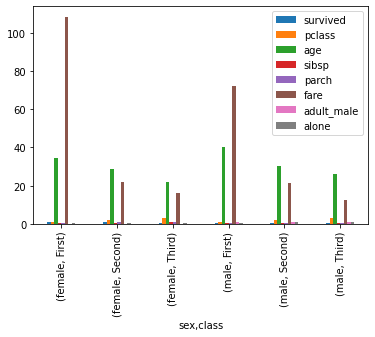

In [35]:
#plotting groupby plots for cleaned data
ndf.groupby(['sex','class']).mean().plot.bar()

##  Relatioships and Correlations

In [36]:
#finding correlation (positive and negative) of the cleaned data
cndf= ndf.corr()

<AxesSubplot:>

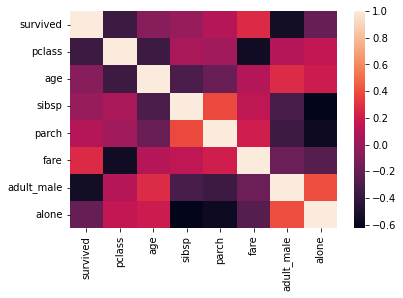

In [37]:
#plotting heatmap of the data correlation
#positive correlation is when increase one thing increses other thing
#negative correlation is inversely proportional means one thing increases other thing decreases.
sns.heatmap(cndf)

<AxesSubplot:>

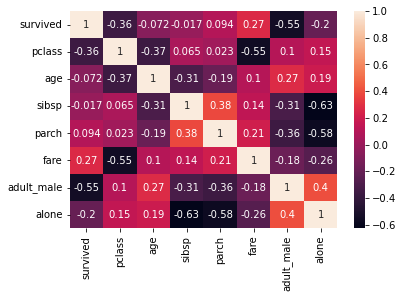

In [38]:
# romoving color and showing ablsolute values in heatmaps
sns.heatmap(cndf, annot = True)

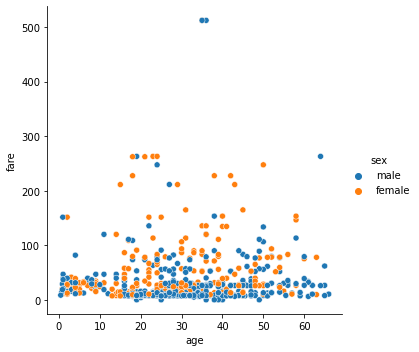

In [39]:
# Relation plot: correlating (only numerical data is used)numerical values in data
sns.relplot(x='age', y='fare',hue='sex', data= ndf)

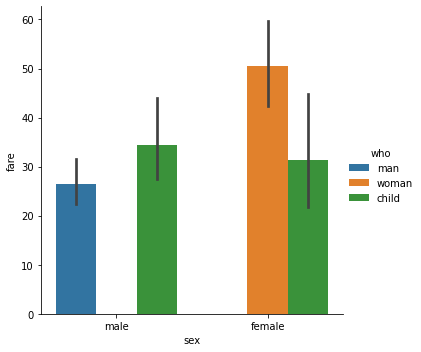

In [40]:
#category plot
sns.catplot(x='sex', y='fare',hue='who', data= ndf,kind='bar')

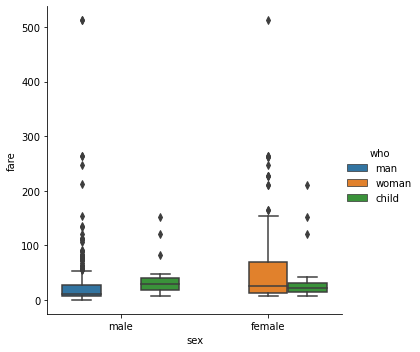

In [41]:
#categorical box plot
sns.catplot(x='sex', y='fare',hue='who', data= ndf,kind='box')

C:\Users\mrloo\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\mrloo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare', ylabel='Density'>

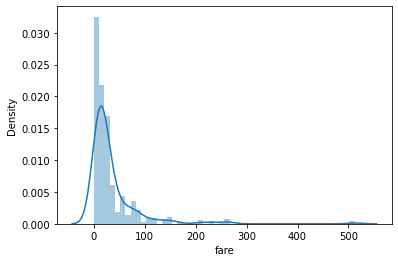

In [42]:
#adding new column and making log of fare as its value
ndf['fare_log'] = np.log(ndf['fare'])
sns.distplot(ndf['fare'])

In [43]:
#checking added column
ndf.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,fare_log
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,1.981001
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,4.266662
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,2.070022
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,3.972177
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,2.085672


C:\Users\mrloo\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:ylabel='fare_log'>

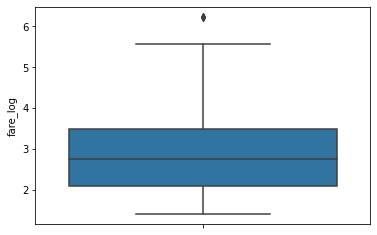

In [44]:
# log transformation
ndf["fare_log"] = np.log(ndf['fare'])
sns.boxplot(y='fare_log',data=ndf)


C:\Users\mrloo\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


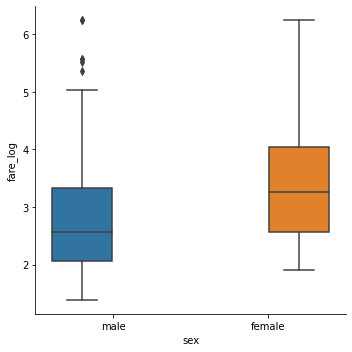

In [45]:
ndf["fare_log"] = np.log(ndf['fare'])
sns.catplot(x='sex',y='fare_log',hue="sex", data=ndf, kind= 'box')